In [4]:
import pandas as pd

# Load the data from the Excel file
file_path = '/content/final_adj.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure and content
data.head()


,Year,Number Of Children,AGE(6-10),AGE(11-14),AGE(15-18),State_belong_to,Repatriated_to their_family_within_State,Shifted_to_another_state_&_Children_Home (concerned_state),Remarks
0,Jan - Dec 2014,18,2,12,4,"Punjab-13\n,Bihar-03\nDelhi-01,\nOthers state-01",17,1,NaN
1,Jan - Dec 2015,55,12,42,1,"Punjab-15\n,Uttar Pradesh-32,\nBihar-02,\nRaja...",42,12,01 child run away from Children Home\n(27 chil...
2,Jan - Dec 2016,26,8,17,1,"Punjab-16,\nUttar Pradesh-02,\nBihar-04,\nOthe...",19,5(1 Nepal),02 children run away from home.\n01 child shif...
3,Jan - Dec 2017,44,12,26,6,"Punjab-23,\nUttar Pradesh-02,\nBihar-13,\nRaja...",34,10,(13 children rescued from Child Labour from S....
4,Jan - Dec 2018,40,13,17,10,"Punjab-20,\nUttar Pradesh-06,\nBihar-06,\nRaja...",20,15 (4 shift to Nepal),03 children still staying children home\n04 ch...


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Basic descriptive statistics
print(data.describe())

# Frequency of specific variables
print(data['State_belong_to'].value_counts())


       Number Of Children  AGE(6-10)  AGE(11-14)  AGE(15-18)
count           10.000000   10.00000   10.000000   10.000000
mean            32.100000    7.50000   19.300000    5.300000
std             15.073524    4.88194   12.832684    3.465705
min              9.000000    1.00000    5.000000    1.000000
25%             20.000000    3.00000   10.500000    1.750000
50%             32.000000    8.00000   16.500000    5.500000
75%             43.000000   12.00000   23.750000    8.000000
max             55.000000   13.00000   42.000000   10.000000
State_belong_to
Punjab-13\n,Bihar-03\nDelhi-01,\nOthers state-01                                                                   1
Punjab-15\n,Uttar Pradesh-32,\nBihar-02,\nRajasthan-01,\nRunaway-01,Haryana-01,\nDelhi-01,\nWest Bengal-02\n       1
Punjab-16,\nUttar Pradesh-02,\nBihar-04,\nOthers state-01,\nJharkhand-01,\nNepal-2                                 1
Punjab-23,\nUttar Pradesh-02,\nBihar-13,\nRajasthan-01,\nDelhi-01,Jammu & Kashmir-01

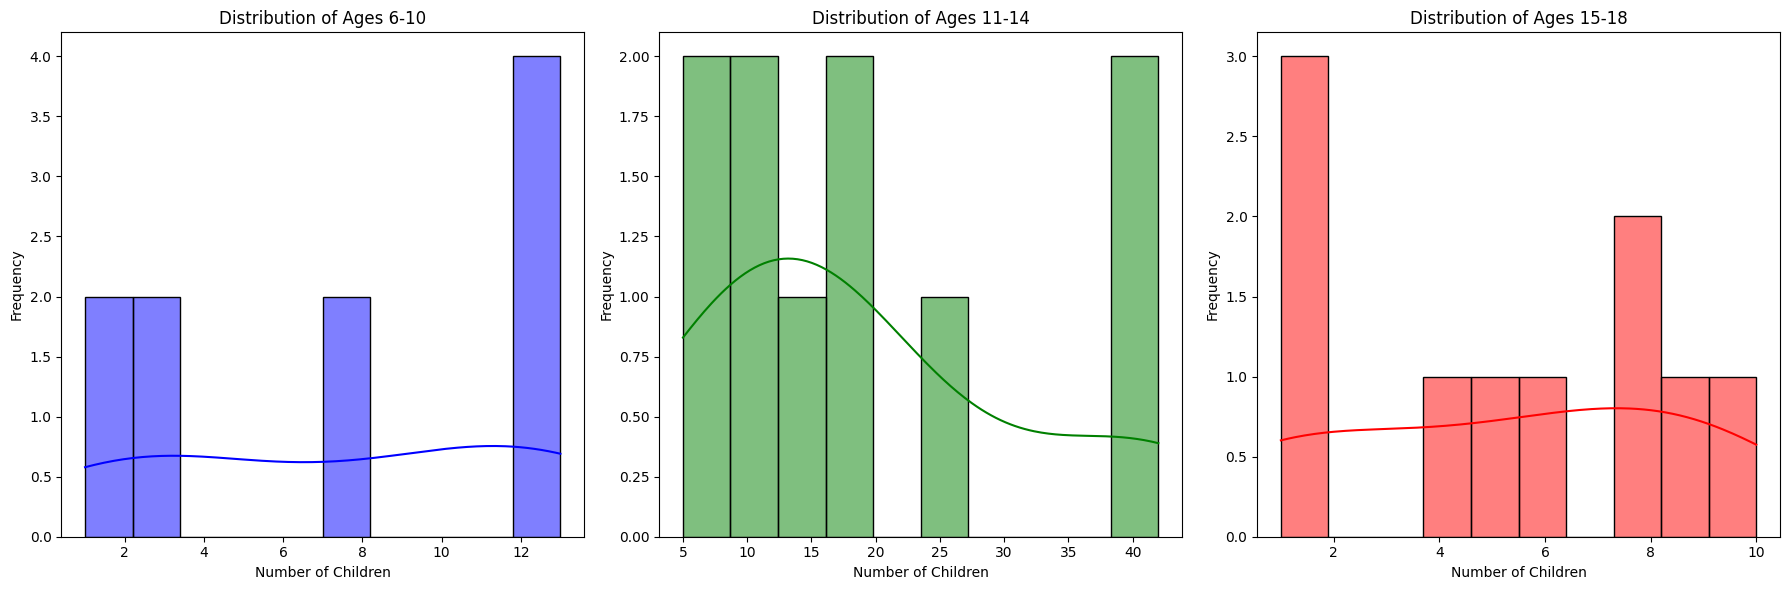

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for multiple plots
plt.figure(figsize=(18, 6))

# Plot for AGE(6-10)
plt.subplot(1, 3, 1)
sns.histplot(data['AGE(6-10)'], kde=True, bins=10, color='blue')
plt.title('Distribution of Ages 6-10')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

# Plot for AGE(11-14)
plt.subplot(1, 3, 2)
sns.histplot(data['AGE(11-14)'], kde=True, bins=10, color='green')
plt.title('Distribution of Ages 11-14')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

# Plot for AGE(15-18)
plt.subplot(1, 3, 3)
sns.histplot(data['AGE(15-18)'], kde=True, bins=10, color='red')
plt.title('Distribution of Ages 15-18')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


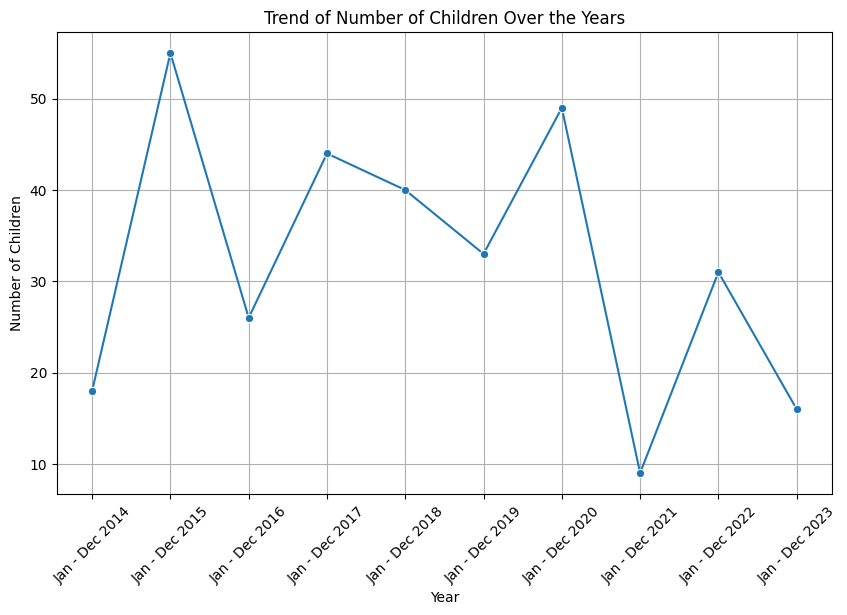

,Number Of Children,AGE(6-10),AGE(11-14),AGE(15-18)
count,10.000000,10.00000,10.000000,10.000000
mean,32.100000,7.50000,19.300000,5.300000
std,15.073524,4.88194,12.832684,3.465705
min,9.000000,1.00000,5.000000,1.000000
25%,20.000000,3.00000,10.500000,1.750000
50%,32.000000,8.00000,16.500000,5.500000
75%,43.000000,12.00000,23.750000,8.000000
max,55.000000,13.00000,42.000000,10.000000
mode,9.000000,3.00000,17.000000,1.000000


In [11]:
# Calculating basic descriptive statistics: mean, median, and mode for the age groups and number of children
descriptive_stats = data[['Number Of Children', 'AGE(6-10)', 'AGE(11-14)', 'AGE(15-18)']].describe()
descriptive_stats.loc['mode'] = data[['Number Of Children', 'AGE(6-10)', 'AGE(11-14)', 'AGE(15-18)']].mode().iloc[0]
descriptive_stats

# Performing trend analysis by plotting the number of children over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Number Of Children', marker='o')
plt.title('Trend of Number of Children Over the Years')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Children')
plt.grid(True)
plt.show()

# Return the descriptive statistics
descriptive_stats


[17 42 19 34 20 '24 (16 children belong to migration families)'
 '43(35 children belong to migration families)' 7
 '25(13 children belong to migration families)'
 '11(06 children belong to migration families)']
[18 55 26 44 40 33 49  9 31 16]


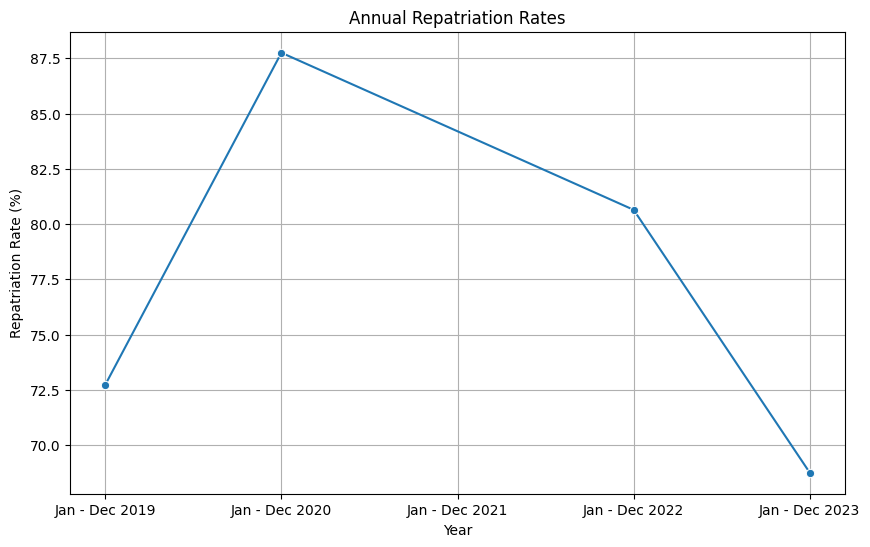

In [16]:
# First, check if there are non-numeric characters in the columns
print(data['Repatriated_to their_family_within_State'].unique())
print(data['Number Of Children'].unique())

# Assuming the error is due to format issues, we will convert these columns to integers.
# Strip any non-numeric characters and convert the columns to integer type
data['Repatriated_to their_family_within_State'] = data['Repatriated_to their_family_within_State'].str.extract('(\d+)').astype(float)
data['Number Of Children'] = data['Number Of Children'].astype(float)

# Calculate the repatriation rate again
repatriation_rate = (data['Repatriated_to their_family_within_State'] / data['Number Of Children']) * 100

# Plot the repatriation rate over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Year'], y=repatriation_rate, marker='o')
plt.title('Annual Repatriation Rates')
plt.xlabel('Year')
plt.ylabel('Repatriation Rate (%)')
plt.grid(True)
plt.show()


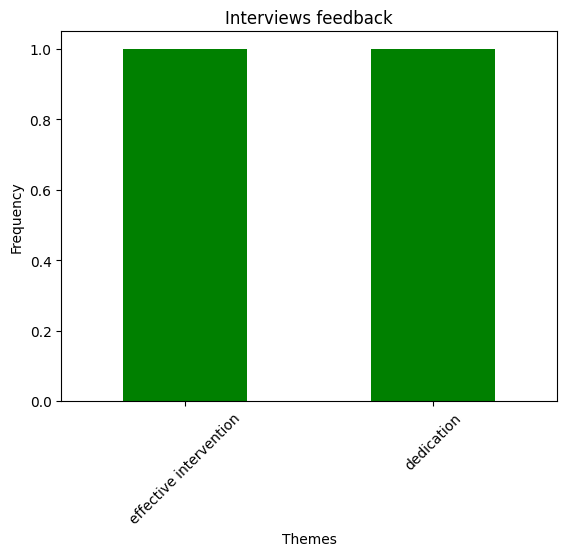

In [14]:
# Example of coding for positive themes
positive_feedback = [
    {"theme": "effective intervention", "text": "The timely intervention by the social worker prevented further harm."},
    {"theme": "dedication", "text": "Our social workers go above and beyond to ensure the safety of the children."},
    # More feedback entries
]

# Convert to DataFrame and visualize
feedback_data = pd.DataFrame(positive_feedback)
theme_counts = feedback_data['theme'].value_counts()

# Plotting
theme_counts.plot(kind='bar', color='green')
plt.title('Interviews feedback')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


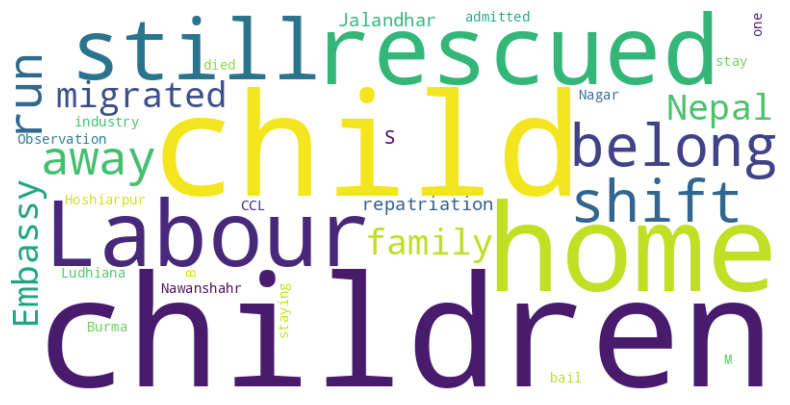

In [15]:
from wordcloud import WordCloud

# Combine all remarks into a single string
remarks_text = " ".join(remark for remark in data['Remarks'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(remarks_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
import statsmodels.api as sm

# Check data types first
print(data[['AGE(11-14)', 'Number Of Children']].dtypes)

# If the data types are not floats or ints, convert them
data['AGE(11-14)'] = pd.to_numeric(data['AGE(11-14)'], errors='coerce')
data['Number Of Children'] = pd.to_numeric(data['Number Of Children'], errors='coerce')

# Now, run the regression analysis
X = sm.add_constant(data['AGE(11-14)'])  # adding a constant
model = sm.OLS(data['Number Of Children'], X, missing='drop').fit()  # handle any NaNs by dropping them
model_summary = model.summary()
model_summary


AGE(11-14)              int64
Number Of Children    float64
dtype: object


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Number Of Children   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     34.31
Date:                Sat, 11 May 2024   Prob (F-statistic):           0.000380
Time:                        03:13:36   Log-Likelihood:                -32.464
No. Observations:                  10   AIC:                             68.93
Df Residuals:                       8   BIC:                             69.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6853      4.121      2.836      0.022       2.183      21.188
AGE(11-14)     1.0578      0.181      5.857      0.000       0.641       1.474
==============================================================================
Omnibus:                        2.026   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.001
Skew:                           0.396   Prob(JB):                        0.606
Kurtosis:                       1.668   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

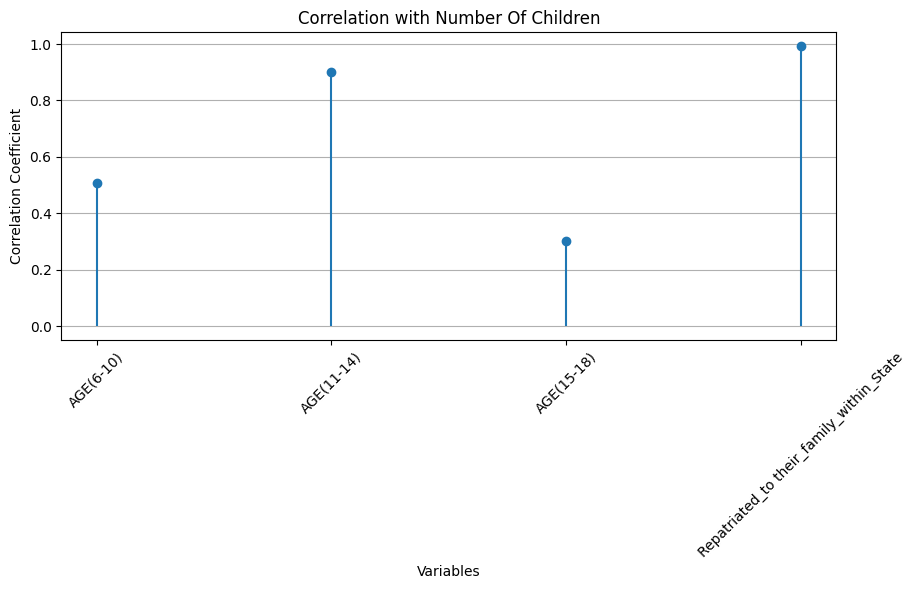

In [19]:
# Exclude the 'Year' column and recalculate the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

# Focus on the 'Number Of Children' correlations
correlations = correlation_matrix['Number Of Children'].drop('Number Of Children')  # drop self-correlation

# Plotting the lollipop chart for correlations with 'Number Of Children'
plt.figure(figsize=(10, 4))
plt.stem(correlations.index, correlations.values, basefmt=" ")
plt.title('Correlation with Number Of Children')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


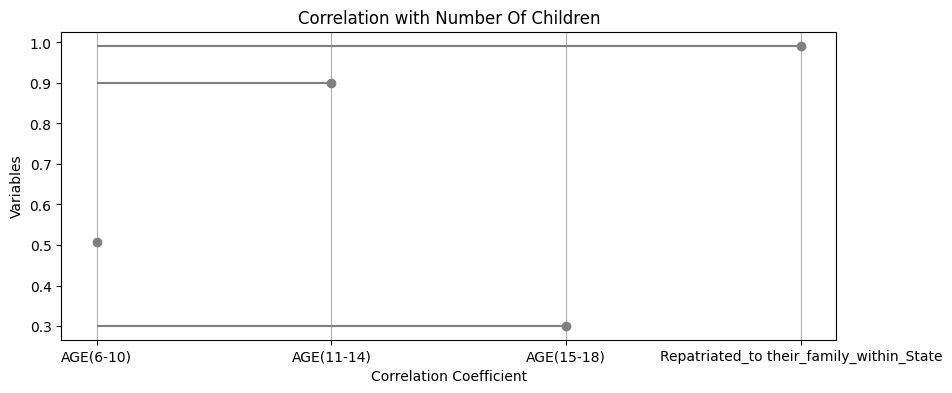

In [20]:
# Plotting the lollipop chart for correlations with 'Number Of Children' horizontally for better presentation
plt.figure(figsize=(10, 4))
plt.stem(correlations.values, correlations.index, orientation='horizontal', basefmt=" ", linefmt='grey', markerfmt='o')
plt.title('Correlation with Number Of Children')
plt.ylabel('Variables')
plt.xlabel('Correlation Coefficient')
plt.grid(True, axis='x')
plt.show()


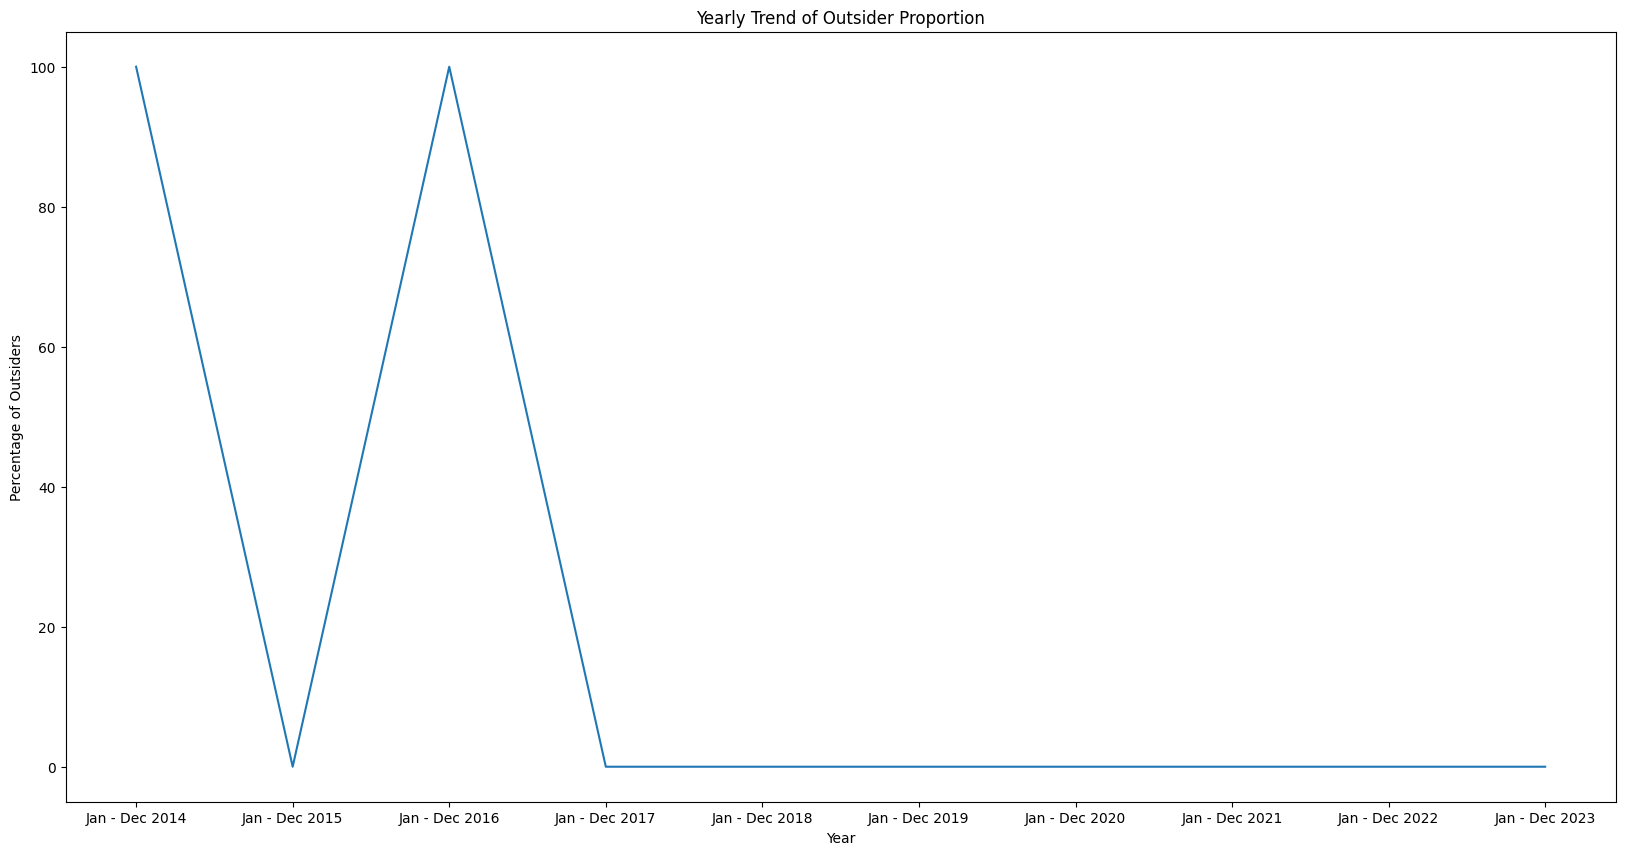

In [23]:
# Example: Assuming 'State_belong_to' contains state data and 'Other' indicates outsiders
data['Is_Outsider'] = data['State_belong_to'].apply(lambda x: 'Other' in x)
outsider_rate = data.groupby('Year')['Is_Outsider'].mean() * 100

plt.figure(figsize=(20, 10))
sns.lineplot(x=outsider_rate.index, y=outsider_rate.values)
plt.title('Yearly Trend of Outsider Proportion')
plt.ylabel('Percentage of Outsiders')
plt.xlabel('Year')
plt.show()


In [32]:
import pandas as pd

# Load the data from the Excel file
file_path = '/content/df.xlsx'
df= pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure and content
df.head()

,Year,Percentage of Outsiders
0,Jan - Dec 2014,0.0
1,Jan - Dec 2015,0.2
2,Jan - Dec 2016,1.0
3,Jan - Dec 2017,0.0
4,Jan - Dec 2018,0.8


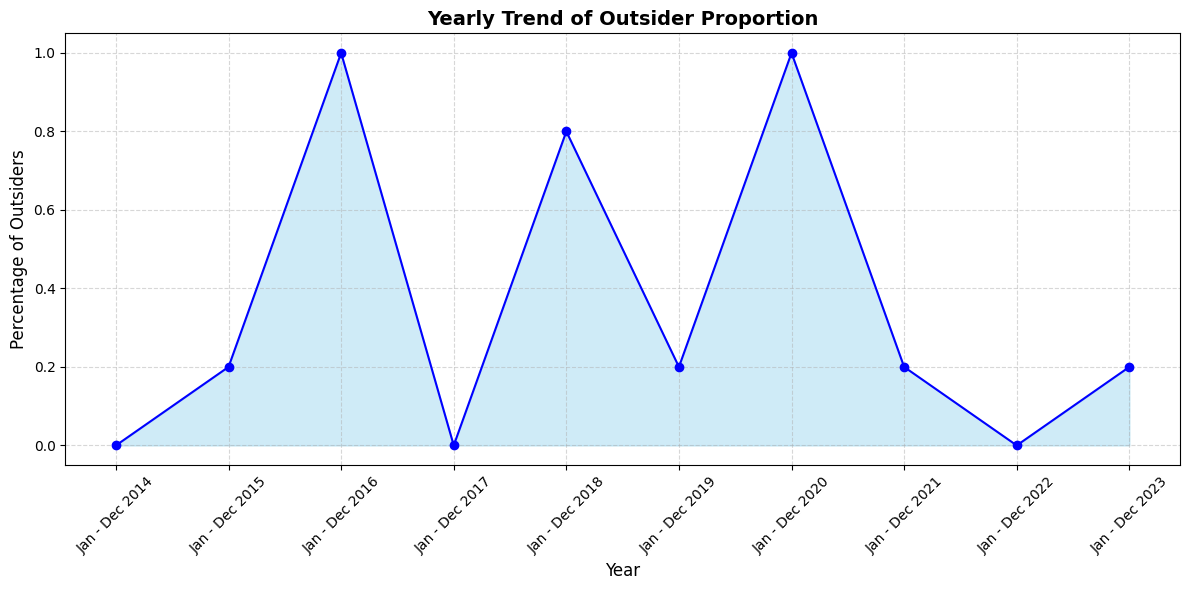

In [33]:
# Create a numerical representation for the years to avoid issues with date strings
df['Year_Index'] = range(len(df['Year']))

# Creating the plot with numerical x-axis
plt.figure(figsize=(12, 6))
plt.plot(df['Year_Index'], df['Percentage of Outsiders'], marker='o', linestyle='-', color='b')
plt.fill_between(df['Year_Index'], df['Percentage of Outsiders'], color="skyblue", alpha=0.4)

# Beautify the plot
plt.title('Yearly Trend of Outsider Proportion', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Outsiders', fontsize=12)
plt.xticks(df['Year_Index'], df['Year'], rotation=45)
plt.grid(True, linestyle='--', which='both', alpha=0.5)
plt.tight_layout()
plt.show()
